<a href="https://colab.research.google.com/github/Kim-Hyerin/pdm06/blob/master/py-tensorflow/tf2_4_mnist_FCN_test_ALL_pdm06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test of mnist FCN model**
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.3.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [3]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [4]:
fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [5]:
fcn2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
fcn2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3053 - accuracy: 0.9115
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1545 - accuracy: 0.9552
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1160 - accuracy: 0.9654
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0978 - accuracy: 0.9689
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - accuracy: 0.9739
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9766
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9781
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9808
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9812
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.050

In [7]:
fcn2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9810


[0.07491280883550644, 0.9810000061988831]

## **FCN3**

In [8]:
fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [9]:
fcn3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
________________________________________________

In [10]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.9165
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - accuracy: 0.9592
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1031 - accuracy: 0.9688
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9726
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9764
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0679 - accuracy: 0.9781
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0638 - accuracy: 0.9801
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9818
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9833
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.048

In [11]:
fcn3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9812


[0.07898609340190887, 0.9811999797821045]

## **FCN4**

In [12]:
fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [13]:
fcn4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [14]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.8965
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1614 - accuracy: 0.9543
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1272 - accuracy: 0.9641
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 0.9685
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0934 - accuracy: 0.9729
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0847 - accuracy: 0.9751
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9767
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9793
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9808
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.061

In [15]:
fcn4.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.9818


[0.08874131739139557, 0.9818000197410583]

## **FCN5**

In [16]:
fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
fcn5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

In [21]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0518 - accuracy: 0.9868
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9870
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9880
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.9876
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0493 - accuracy: 0.9876
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0428 - accuracy: 0.9887
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0432 - accuracy: 0.9889
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0433 - accuracy: 0.9892
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9890
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.040

In [22]:
fcn5.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9819


[0.09885973483324051, 0.9818999767303467]

# **[DIY] Hidden layer에 따른 정확도**

In [23]:
fcn_result = [[0.07491280883550644, 0.9810000061988831], # FCN2
 [0.07898609340190887, 0.9811999797821045], # FCN3
 [0.08874131739139557, 0.9818000197410583], # FCN4
 [0.09885973483324051, 0.9818999767303467]] # FCN5

In [24]:
# select accuracies FCN2,3,4,5
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9810000061988831,
 0.9811999797821045,
 0.9818000197410583,
 0.9818999767303467]

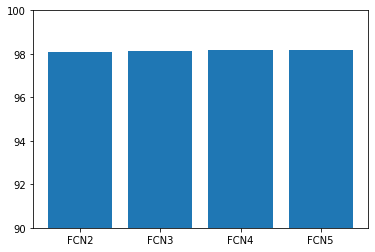

In [26]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
plt.ylim((90,100)) # % , tuple
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [27]:
fcn3.save('fcn3_best.hdf5')

In [29]:
from keras.models import load_model

model2 = load_model('fcn3_best.hdf5')
model2.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9812


[0.07898609340190887, 0.9811999797821045]

FCN을 streamlit으로 시뮬레이션하는 웹 앱
http://life21c.inje.ac.kr:7777